In [1]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle competitions download -c cifar-10


100% 714M/715M [00:36<00:00, 24.5MB/s]
100% 715M/715M [00:36<00:00, 20.8MB/s]


In [5]:
!ls

cifar-10.zip  kaggle.json  sample_data


In [7]:
# extracting the compessed Dataset
from zipfile import ZipFile
dataset = '/content/cifar-10.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [8]:
!ls

cifar-10.zip  sample_data	    test.7z   trainLabels.csv
kaggle.json   sampleSubmission.csv  train.7z


In [10]:
!pip install py7zr
import py7zr
archive = py7zr.SevenZipFile('/content/train.7z', mode='r')
archive.extractall()     #archive.extractall(path='/content/Training Data')
archive.close()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [11]:
!ls

cifar-10.zip  sample_data	    test.7z  train.7z
kaggle.json   sampleSubmission.csv  train    trainLabels.csv


In [13]:
import os
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split

In [14]:
filenames = os.listdir('/content/train')

In [15]:
len(filenames)

50000

In [18]:
labels_df = pd.read_csv('/content/trainLabels.csv')

In [19]:
labels_df[labels_df['id']==6009]

,id,label
6008,6009,airplane


In [20]:
labels_df['label'].value_counts()

frog          5000
truck         5000
deer          5000
automobile    5000
bird          5000
horse         5000
ship          5000
cat           5000
dog           5000
airplane      5000
Name: label, dtype: int64

In [21]:
labels_dictionary = {'airplane':0, 'automobile':1, 'bird':2, 'cat':3, 'deer':4, 'dog':5, 'frog':6, 'horse':7, 'ship':8, 'truck':9}

labels = [labels_dictionary[i] for i in labels_df['label']]

In [23]:
print(labels[0:5])
print(labels[-5:])

[6, 9, 9, 4, 1]
[2, 6, 9, 1, 1]


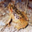

In [24]:
import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread('/content/train/7796.png')
cv2_imshow(img)

In [25]:
img.shape

(32, 32, 3)

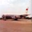

In [27]:
import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread('/content/train/6009.png')
cv2_imshow(img)

In [28]:
labels_df[labels_df['id'] == 6009]

,id,label
6008,6009,airplane


In [29]:
id_list = list(labels_df['id'])

In [30]:
# convert images to numpy arrays

train_data_folder = '/content/train/'

data = []
 
for id in id_list:

  image = Image.open(train_data_folder + str(id) + '.png')
  image = np.array(image)
  data.append(image)

In [31]:
data[6009]

array([[[ 49,  52,  55],
        [ 51,  52,  55],
        [ 53,  51,  54],
        ...,
        [ 51,  51,  51],
        [ 52,  52,  52],
        [ 51,  51,  51]],

       [[ 49,  52,  48],
        [ 48,  50,  47],
        [ 49,  49,  47],
        ...,
        [ 50,  49,  47],
        [ 52,  52,  52],
        [ 50,  50,  50]],

       [[ 49,  52,  42],
        [ 49,  53,  47],
        [ 56,  64,  61],
        ...,
        [ 49,  50,  47],
        [ 52,  51,  52],
        [ 50,  50,  50]],

       ...,

       [[ 51,  48,  45],
        [ 77,  71,  59],
        [117, 110,  86],
        ...,
        [ 52,  51,  52],
        [ 51,  51,  51],
        [ 51,  51,  51]],

       [[ 50,  49,  46],
        [ 68,  66,  56],
        [102,  99,  80],
        ...,
        [ 51,  51,  51],
        [ 50,  51,  51],
        [ 51,  51,  51]],

       [[ 50,  50,  47],
        [ 53,  52,  48],
        [ 64,  61,  55],
        ...,
        [ 52,  51,  51],
        [ 52,  52,  52],
        [ 51,  51,  51]]

In [32]:
X=np.array(data)
Y=np.array(labels)

In [33]:
Y

array([6, 9, 9, ..., 9, 1, 1])

In [34]:
print(X.shape)
print(Y.shape)

(50000, 32, 32, 3)
(50000,)


In [35]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [36]:
print(X.shape, X_train.shape, X_test.shape)

(50000, 32, 32, 3) (40000, 32, 32, 3) (10000, 32, 32, 3)


In [37]:
# scaling the data

X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [38]:
X_train_scaled

array([[[[0.81960784, 0.82352941, 0.79607843],
         [0.83529412, 0.83921569, 0.81960784],
         [0.85490196, 0.85882353, 0.84313725],
         ...,
         [0.49803922, 0.29019608, 0.15294118],
         [0.47843137, 0.26666667, 0.1372549 ],
         [0.45490196, 0.24705882, 0.1254902 ]],

        [[0.82352941, 0.82352941, 0.79215686],
         [0.83529412, 0.83921569, 0.81176471],
         [0.85490196, 0.8627451 , 0.83921569],
         ...,
         [0.48627451, 0.2745098 , 0.1372549 ],
         [0.4745098 , 0.2627451 , 0.12941176],
         [0.48235294, 0.27058824, 0.14117647]],

        [[0.80784314, 0.80392157, 0.76470588],
         [0.81960784, 0.81960784, 0.79215686],
         [0.83529412, 0.84313725, 0.81960784],
         ...,
         [0.48627451, 0.2745098 , 0.14509804],
         [0.51372549, 0.30196078, 0.16470588],
         [0.51372549, 0.30588235, 0.16078431]],

        ...,

        [[0.49803922, 0.42352941, 0.38039216],
         [0.54117647, 0.47843137, 0.43137255]

In [39]:
import tensorflow as tf
from tensorflow import keras

In [40]:

num_of_classes = 10

# setting up the layers of Neural Network

model = keras.Sequential([
    
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(num_of_classes, activation='softmax')
])

In [41]:
# compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [37]:
model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=10)

Epoch 1/10
1125/1125 [==============================] - 8s 3ms/step - loss: 1.9455 - acc: 0.2940 - val_loss: 1.8364 - val_acc: 0.3410
Epoch 2/10
1125/1125 [==============================] - 3s 3ms/step - loss: 1.8182 - acc: 0.3511 - val_loss: 1.7708 - val_acc: 0.3683
Epoch 3/10
1125/1125 [==============================] - 4s 4ms/step - loss: 1.7840 - acc: 0.3631 - val_loss: 1.7468 - val_acc: 0.3837
Epoch 4/10
1125/1125 [==============================] - 3s 3ms/step - loss: 1.7602 - acc: 0.3750 - val_loss: 1.7239 - val_acc: 0.3808
Epoch 5/10
1125/1125 [==============================] - 3s 3ms/step - loss: 1.7432 - acc: 0.3783 - val_loss: 1.7382 - val_acc: 0.3730
Epoch 6/10
1125/1125 [==============================] - 3s 3ms/step - loss: 1.7384 - acc: 0.3793 - val_loss: 1.7626 - val_acc: 0.3683
Epoch 7/10
1125/1125 [==============================] - 4s 4ms/step - loss: 1.7233 - acc: 0.3847 - val_loss: 1.7352 - val_acc: 0.3708
Epoch 8/10
1125/1125 [==============================] - 3s 3ms

In [38]:
from tensorflow.keras import Sequential, models, layers
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras import optimizers

In [39]:
convolutional_base = ResNet50(weights='imagenet', include_top=False, input_shape=(256,256,3))
convolutional_base.summary()

94765736/94765736 [==============================] - 3s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 262, 262, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 128, 128, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                          

In [40]:
num_of_classes = 10

model = models.Sequential()
model.add(layers.UpSampling2D((2,2)))
model.add(layers.UpSampling2D((2,2)))
model.add(layers.UpSampling2D((2,2)))
model.add(convolutional_base)
model.add(layers.Flatten())
model.add(layers.BatchNormalization())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(num_of_classes, activation='softmax'))

In [41]:
model.compile(optimizer=optimizers.RMSprop(lr=2e-5), loss='sparse_categorical_crossentropy', metrics=['acc'])

In [42]:
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=10)

Epoch 1/10
1125/1125 [==============================] - 475s 388ms/step - loss: 2.2072 - acc: 0.2028 - val_loss: 1.8104 - val_acc: 0.3173
Epoch 2/10
1125/1125 [==============================] - 437s 388ms/step - loss: 1.5556 - acc: 0.4282 - val_loss: 1.3791 - val_acc: 0.4780
Epoch 3/10
1125/1125 [==============================] - 430s 382ms/step - loss: 1.3027 - acc: 0.5412 - val_loss: 1.1578 - val_acc: 0.5885
Epoch 4/10
1125/1125 [==============================] - 437s 389ms/step - loss: 1.1446 - acc: 0.6087 - val_loss: 0.9162 - val_acc: 0.6708
Epoch 5/10
1125/1125 [==============================] - 438s 389ms/step - loss: 1.0153 - acc: 0.6551 - val_loss: 0.9737 - val_acc: 0.6560
Epoch 6/10
1125/1125 [==============================] - 437s 388ms/step - loss: 0.9259 - acc: 0.6904 - val_loss: 1.0834 - val_acc: 0.6225
Epoch 7/10
1125/1125 [==============================] - 430s 382ms/step - loss: 0.8496 - acc: 0.7176 - val_loss: 0.9411 - val_acc: 0.6787
Epoch 8/10
1125/1125 [============

In [43]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

313/313 [==============================] - 35s 107ms/step - loss: 0.7319 - acc: 0.7507
Test Accuracy = 0.7506999969482422


In [48]:
import cv2
import matplotlib.pyplot as plt

In [49]:
image=cv2.imread('/content/download (5).png')

In [50]:
image.shape

(189, 267, 3)

In [51]:
new_image_32=cv2.resize(image,(32,32))

In [55]:
new_image_32.shape

(32, 32, 3)

In [52]:
new_image_32=new_image_32/255
new_image_32

array([[[0.83529412, 0.81176471, 0.79215686],
        [0.82745098, 0.80392157, 0.78431373],
        [0.82352941, 0.8       , 0.77254902],
        ...,
        [0.83921569, 0.80784314, 0.78039216],
        [0.81568627, 0.78431373, 0.75686275],
        [0.82352941, 0.79215686, 0.76470588]],

       [[0.85490196, 0.81960784, 0.78431373],
        [0.85098039, 0.81568627, 0.78039216],
        [0.83137255, 0.79607843, 0.76078431],
        ...,
        [0.90196078, 0.89411765, 0.85882353],
        [0.82745098, 0.81568627, 0.78431373],
        [0.81960784, 0.78823529, 0.76078431]],

       [[0.82352941, 0.77647059, 0.72941176],
        [0.81960784, 0.77254902, 0.7254902 ],
        [0.80392157, 0.76078431, 0.70588235],
        ...,
        [0.83529412, 0.83529412, 0.80392157],
        [0.83921569, 0.83921569, 0.80784314],
        [0.86666667, 0.83529412, 0.80784314]],

       ...,

       [[0.31372549, 0.67058824, 0.64313725],
        [0.41568627, 0.76862745, 0.74509804],
        [0.29803922, 0

In [53]:
def model_predict(X):
  return model.predict(X)

In [58]:
model_predict([new_image_32])

ValueError: ignored

In [61]:
y_pred=model.predict(X_test_scaled)
y_pred[:1]

313/313 [==============================] - 31s 101ms/step


array([[2.7661102e-02, 4.0956889e-04, 6.4746171e-01, 1.2665416e-01,
        8.1515923e-02, 3.5262499e-02, 7.5269930e-02, 4.3663755e-03,
        1.2270241e-03, 1.7164052e-04]], dtype=float32)

In [62]:
np.argmax(y_pred[:1])

2

In [45]:
import pickle 

In [46]:
filename = 'Cifar_10.sav'
pickle.dump(model, open(filename, 'wb'))

In [47]:
loaded_model = pickle.load(open('Cifar_10.sav', 'rb'))